In [5]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1: 1D PEC-PMC Cavity, Eigenmode formulation

### 0. Maxwell Equations (time domain)
$\nabla \times E = - \mu \frac{\partial H}{\partial t}$

$\nabla \times H = \epsilon \frac{\partial E}{\partial t}$

### 1. Time Domain $\rightarrow$ Frequency Domain

Using the Fourier transform we get:

$E(r, t) \rightarrow E(r, \omega)$

$\frac{\partial E}{\partial t} \rightarrow i\omega E$

Thus our wave equation transforms into:

$\nabla E = - i \omega \mu H$

$\nabla E = - i \omega \epsilon E$

### 2. 1D Coordinates

${H_y}_{i}, {E_z}_{i+\frac{1}{2}}, i \in \mathcal{N}$

$\frac{\partial E_z}{\partial x} = - i \omega \mu H_y$

$\frac{\partial H_y}{\partial x} = i \omega \epsilon E_z$

### 3. Discretization
$\frac{\partial {E_z}_i}{\partial x} \approx \frac{{E_z}_{i+1} - {E_z}_{i-1}}{\Delta x}$

$-i\omega\mu {E_z}_{i+\frac{1}{2}} \approx \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}$ - Forward difference

$-i\omega\epsilon {H_y}_{i} \approx \frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}$ - Backward difference

### 4. Wave equation

$H_y = \frac{i}{\omega \mu }\frac{\partial E_z}{\partial x}$

$E_z = \frac{-i}{\omega \epsilon }\frac{\partial H_y}{\partial x}$

$\frac{\partial}{\partial x}\frac{i}{\omega \mu }\frac{\partial}{\partial x} E_z = i \omega \epsilon E_z$

$\frac{1}{\epsilon}\frac{\partial}{\partial x}\frac{1}{\mu}\frac{\partial}{\partial x} E_z = \omega^2 E_z$

or

$\frac{1}{\mu}\frac{\partial}{\partial x}\frac{1}{\epsilon}\frac{\partial}{\partial x} H_y = \omega^2 H_y$


### 5. Matrix form

$H_y = \frac{i}{\omega \mu }\frac{\partial E_z}{\partial x} \approx \frac{i}{\omega \mu }\frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}$

$
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
=
\frac{i}{\omega \mu \Delta x}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
$

$E_z = \frac{-i}{\omega \epsilon }\frac{\partial H_y}{\partial x} \approx \frac{-i}{\omega \epsilon } \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}$

$
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\omega \mu \Delta x}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
$

$\omega^2 E_z = \frac{1}{\epsilon}\frac{\partial}{\partial x}\frac{1}{\mu}\frac{\partial}{\partial x} E_z$

$
\omega^2
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\mu \Delta x}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\frac{i}{\mu \Delta x}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
$

or, simplifing, and replacing $i+\frac{1}{2}$ with $i$:


$
\omega^2
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix}
=
- \frac{1}{\mu \epsilon \Delta x^2}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix} 
$

### 6. Boundary Conditions

#### PEC

${E_z}_{i} = 0$

#### PMC

${H_y}_{i} = 0$

In our equations, they are automatically satisfied at the boundaries. 

# Implementation
### 0. Setup grid

In [6]:
n   = 100     # Num grid nodes
dx  = 1. / n  # Step size for overall size of 1

eps = 1.      #  Vacuum
mu  = 1.      #  Vacuum

A   = - 1. / (dx**2 * mu * eps)

### 1. Build matrix

In [7]:
# Forward

diag = np.ones(n) * -A
up_diag = np.ones(n) * A

M_1 = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])

# Backward

diag = np.ones(n) * 1
up_diag = np.ones(n) * -1

M_2 = sp.sparse.dia_matrix(([up_diag, diag], [-1, 0]), [n,n])

M = M_1.dot(M_2)

In [31]:
kt = 2*sp.pi*1                                    # wave vector target to find resonance wavelength
k2, V = linalg.eigs(M, k=6, M=None, sigma=kt**2)  # solve for eigenvalues and vectors

k = np.sort(np.sqrt(k2))                          # sort
lam = 2*sp.pi/np.real(k)                          # wavelength
Q = np.real(k)/(2*np.imag(k))                     # quality factor

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


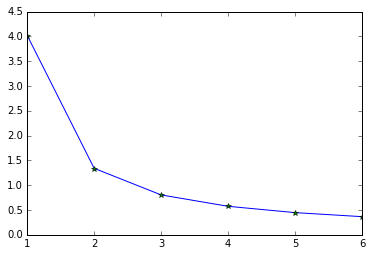

In [32]:
plt.plot(np.arange(1,6.1,1), lam, '-')                         # Num
plt.plot(np.arange(1,6.1,1), 4/(2*np.arange(0,5.1,1)+1), '*')  # Analytic

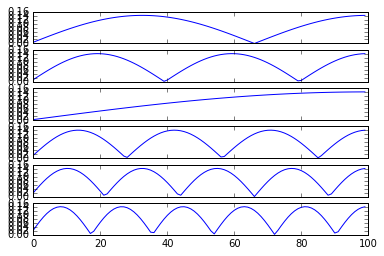

In [33]:
f, ax = plt.subplots(6,1, sharex=True, sharey=True)
for n in np.arange(V.shape[1]):
    ax[n].plot(np.abs(V[:,n]),'-')